## Tutorial Exploração do Dataset

Este notebook tem por objetivo proporcionar uma introdução de duas das bibliotecas que são muito utilizadas na prática de *Machine learning*. 

As duas bibliotecas são:

1. `pandas` [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

1. `seaborn` [(docs)](http://seaborn.pydata.org/api.html)

Além destas duas bibliotecas, vamos utilizar no tutorial também: 

1. a biblioteca `numpy` [(docs)](https://numpy.org/doc/) que possui algumas funções utilitárias e é utilizada internamente por todas as demais bibliotecas que vamos empregar no trabalho prático de *Machine learning*;

1. a biblioteca `matplotlib` [(docs)](https://matplotlib.org/contents.html) que é uma excelente biblioteca para geração de gráficos no `python` e é utilizada internamente pelo `pandas` e pelo `seaborn`.

Abaixo vamos importar as bibliotecas. Note a utilização das funções:

```{python}
sns.set()

rcParams["figure.figsize"] = [8, 6]
```

A primeira função serve para atualizarmos o esquema de cores dos gráficos para que eles fiquem mais fáceis de ler. A segunda função seta um tamanho um pouco maior do que o default para os gráficos, também auxiliando na leitura das imagens.

In [99]:
# módulo para carregar e manipular
# o dataset
import pandas as pd

# modulos para os gráficos
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = [8, 6]

import seaborn as sns
sns.set()

Aqui vamos utilizar a biblioteca pandas para fazer a leitura do dataset contido em um arquivo CSV. A biblioteca `pandas` utiliza uma estrutura de dados chamada de `DataFrame` que otimiza a ocupação da memória RAM do computador. 

In [100]:
df = pd.read_csv('trainingset.csv')

## Relatório de qualidade dos dados

Para começarmos com o relatório de qualidade, vamos utilizar algumas funções incluidas na biblioteca `pandas`.

Antes de mais nada, vamos obter informações sobre o dataset utilizando a função `info()`:


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27272 entries, 0 to 27271
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        24570 non-null  float64
 1   job        24314 non-null  object 
 2   marital    22849 non-null  object 
 3   education  20647 non-null  object 
 4   default    23798 non-null  object 
 5   balance    22510 non-null  float64
 6   housing    25830 non-null  object 
 7   loan       25247 non-null  object 
 8   contact    23762 non-null  object 
 9   day        24364 non-null  float64
 10  month      25496 non-null  object 
 11  duration   23545 non-null  float64
 12  campaign   22815 non-null  float64
 13  pdays      24138 non-null  float64
 14  previous   24875 non-null  float64
 15  poutcome   26817 non-null  object 
 16  y          27272 non-null  object 
dtypes: float64(7), object(10)
memory usage: 3.5+ MB


Como podemos observar, o dataset contém 5 variáveis (*features*), sendo que quatro delas são numéricas (*float64* ou simplesmente *float*) e outra é do tipo objeto (*object*). Desta forma, podemos inferir que as quatro variáveis numéricas são do tipo contínua.

Note também que o dataset ocupa pouco mais de 6kb de memória.

Para entedermos um pouco mais sobre o dataset e observarmos o tipo de objeto armazenado na quinta variável, vamos utilizar a função `head()` do `pandas` que irá mostrar as 5 primeiras linhas do dataset. 

***Observação:***
* se passarmos um número inteiro para a chamada da função `head()`, ela irá imprimir uma quantidade de linhas igual ao valor daquele parâmetro.

In [102]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,44.0,JobCat9,NaN,secondary,no,29.0,yes,no,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
1,47.0,JobCat3,married,unknown,no,1506.0,yes,NaN,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
2,31.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
3,26.0,JobCat6,single,tertiary,no,447.0,yes,yes,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
4,42.0,JobCat4,divorced,tertiary,NaN,2.0,yes,no,unknown,5.0,may,NaN,1.0,-1.0,0.0,unknown,TypeA


O tipo `object`contido na quinta variável tem o formato de `string`. Desta forma, podemos considerar esta variável como sendo do tipo categórica. 

Para gerarmos a tabela de qualidade dos dados utilizaremos a função `describe()` do `pandas`. Por padrão, a função `describe` irá gerar a tabela de qualidade dos dados apenas para as variáveis contínuas, sejam do tipo `float` ou do tipo `int`. 

Note também que nós faremos abaixo um `chaining` dos métodos do `pandas` para que a tabela fique num formato adequado. Isto é necessário pelo fato do `pandas` colocar por padrão as estatísticas como linhas e as variáveis como colunas. Para datasets com muitas variáveis, este comportamento pode dificultar a visualização da tabela.

***Observações:***
* Devemos tomar cuidado com as variáveis do tipo inteiro (`int`): algumas vezes, estas representações numéricas são variáveis categóricas e não contínuas (por exemplo, algum ID vindo de uma tabela de tipos de um banco de dados). Assim, devemos tratá-las como categorias tanto para a extração da tabela de qualidade dos dados quanto para a visualização destas variáveis.
* Por isso, é muito importante inspecionarmos algumas linhas do dataset para entendermos o comportamento das variáveis.
* Em alguns casos raros, faz sentido tratarmos a as variáveis do tipo inteiro (`int`) como categorias e também como contínuas quando extraímos a tabela de qualidade dos dados.
* Por isso, quando utilizamos a função `describe`, devemos informar que tipos de dados serão inclusos na tabela de qualidade.
* Além de informarmos os tipos de dados, quando tratamos uma variável do tipo `int` como categórica, devemos fazer sua conversão para o tipo `object` utilizando `astype('object')`.
* Se necessária o tratamento diferenciado de duas ou mais variáveis do tipo `int` (*i.e.*,  tratar uma parte como categórica e outra como contínua), devemos proceder com a seleção das variáveis. Mais detalhes abaixo.


In [103]:
df.describe(include=['float', 'int']).transpose()

,count,mean,std,min,25%,50%,75%,max
age,24570.0,39.894302,11.445373,16.0,31.0,37.0,48.0,93.0
balance,22510.0,1373.054687,3100.869406,-6847.0,71.0,443.0,1423.0,98417.0
day,24364.0,15.779059,8.295287,1.0,8.0,16.0,21.0,31.0
duration,23545.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
campaign,22815.0,2.744773,3.018258,1.0,1.0,2.0,3.0,63.0
pdays,24138.0,39.980943,100.027931,-1.0,-1.0,-1.0,-1.0,871.0
previous,24875.0,0.578251,1.943030,0.0,0.0,0.0,0.0,58.0


Age

balance

day

duration

campaign

pday 

previous

Agora as variáveis categóricas. Observe que basta trocar os tipos `float` e `int` por `object` e `category`:

```{python}
df.describe(include=['object', 'category']).transpose()
```

In [142]:
df.describe(include=['object', 'category']).transpose()

,count,unique,top,freq
job,24314,12,JobCat3,5298
marital,22849,3,married,13782
education,20647,4,secondary,10573
default,23798,2,no,23368
housing,25830,2,yes,14336
loan,25247,2,no,21228
contact,23762,3,cellular,15300
month,25496,12,may,7758
poutcome,26817,4,unknown,21951
y,27272,2,TypeA,24030


## Visualização dos dados

Para a visualização dos dados, há uma extensa lista de bibliotecas e de possibilidades de combinação entre elas. A mais popular e robusta destas bibliotecas é a `matplotlib`. No entanto, apesar de sua utilização como base para outras bibliotecas até mesmo em outras linguagens, a `matplotlib` possui uma curva de aprendizado bastante íngreme. Como várias das tarefas de visualização envolvem os mesmos tipos de gráficos, muitas opções de bibliotecas foram construídas para encapsular `matplotlib` e facilitar sua utilização.

Dentre estas bibliotecas, a mais popular e robusta é a biblioteca `seaborn`. A `seaborn` abstrai muito da dificuldade em utilizar a `matplotlib` e também possui diversas opções para gerarmos gráficos com apelo visual para utilização em apresentações de slides, posters, etc. Além disso, ela possui diversas opções para geração de gráficos para aquelas pessoas com dificuldade em distiguir cores ou com baixa visão.

Os gráficos de histograma, barra e caixa que iremos utilizar são chamados na `seaborn` de:
* `countplot`: gráfico de barras
* `histplot`: histograma
* `boxplot`: gráfico de caixa

A utilização dos gráficos é muito simples: 
1. basta utilizarmos a importação do `seaborn` (no nosso caso chamado de `sns` no momento da importação); 
2. informarmos o tipo de gráfico (*e.g.*, `sns.histplot()`);
3. informarmos o nome da variável e qual o `DataFrame` onde está armazenada a variável (*e.g.*, `sns.histplot(x='nome_da_variavel', data=dataframe)`.

Vamos começar com as variáveis contínuas e gerar os histogramas abaixo.


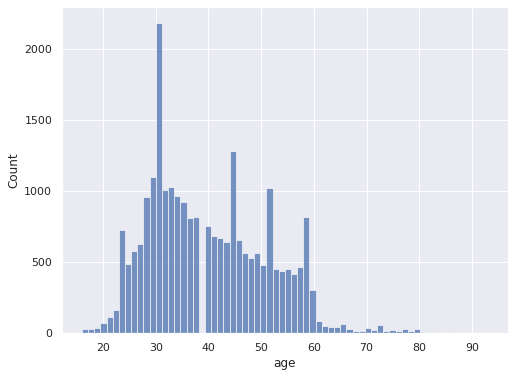

In [105]:
sns.histplot(x='age', data=df)

ha idades com a quntidade(Count) de 0.

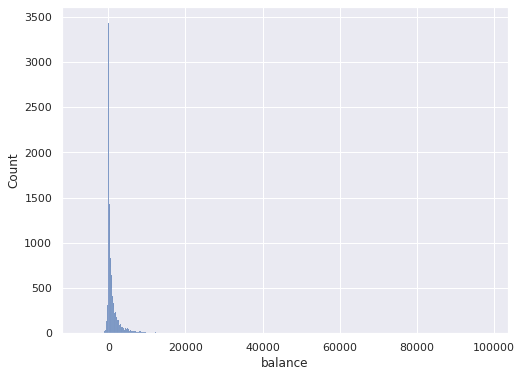

In [106]:
sns.histplot(x='balance', data=df)

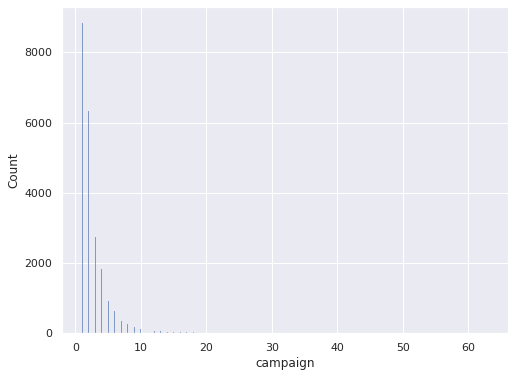

In [107]:
sns.histplot(x='campaign', data=df)

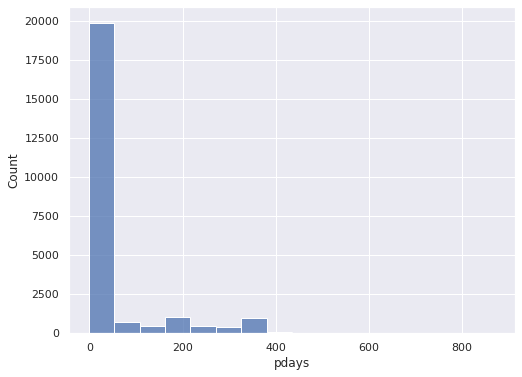

In [147]:
sns.histplot(x='pdays', data=df)

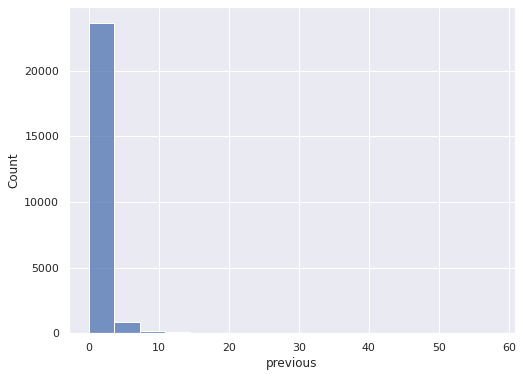

In [109]:
sns.histplot(x='previous', data=df)

Finalmente, iremos utilizar o `countplot` para gerar a visualização da única variável categórica. Note que se passarmos uma variável do tipo `int` para a função `countplot`, ela irá gerar o gráfico normalmente.

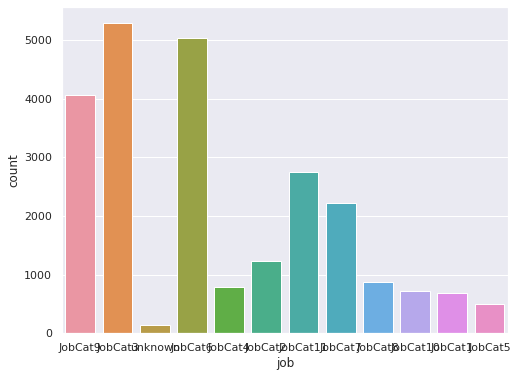

In [146]:
sns.countplot(x='job', data=df)


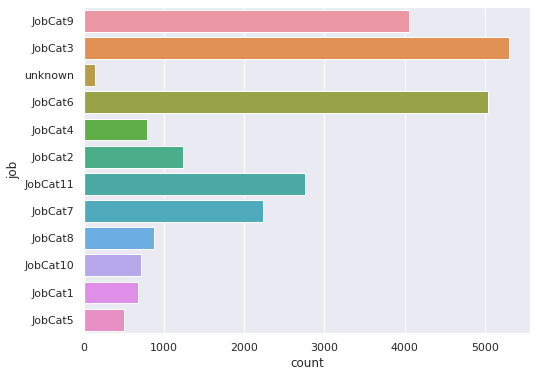

In [111]:
sns.countplot(y='job', data=df)

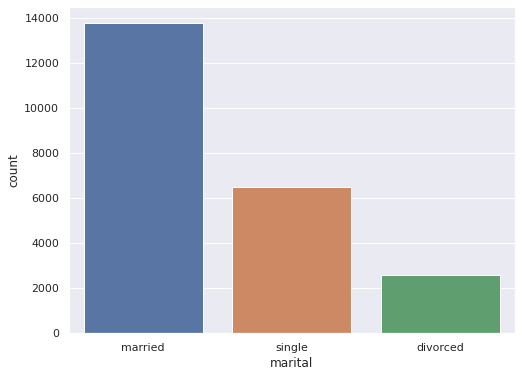

In [112]:
sns.countplot(x='marital', data=df)

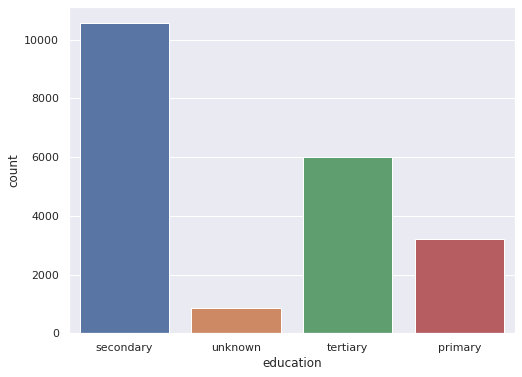

In [113]:
sns.countplot(x='education', data=df)

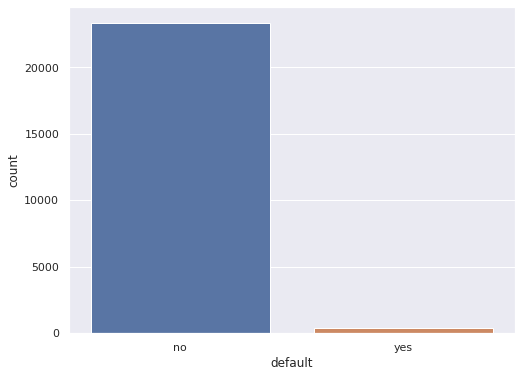

In [114]:
sns.countplot(x='default', data=df)

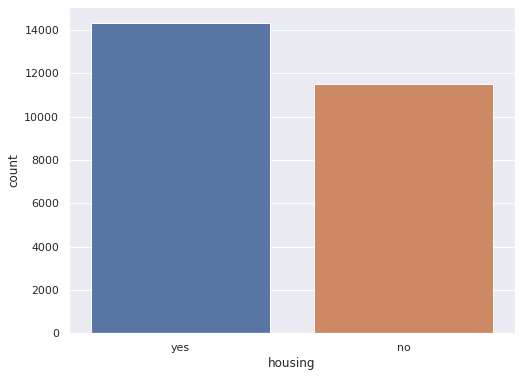

In [115]:
sns.countplot(x='housing', data=df)

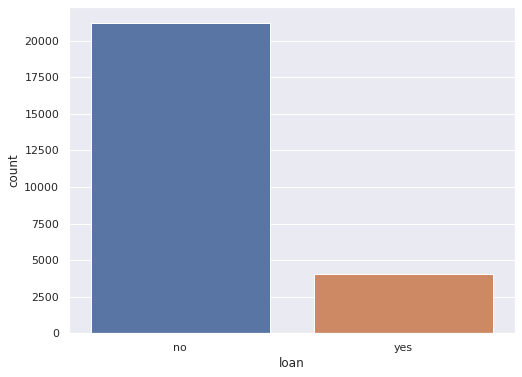

In [116]:
sns.countplot(x='loan', data=df)

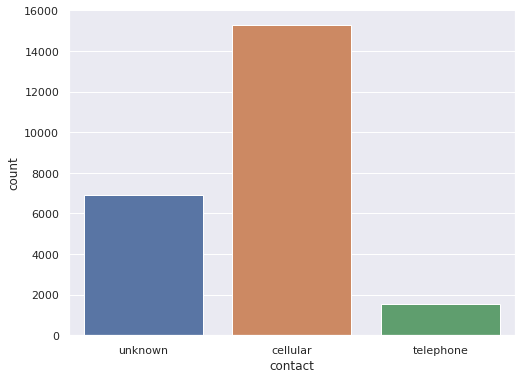

In [117]:
sns.countplot(x='contact', data=df)

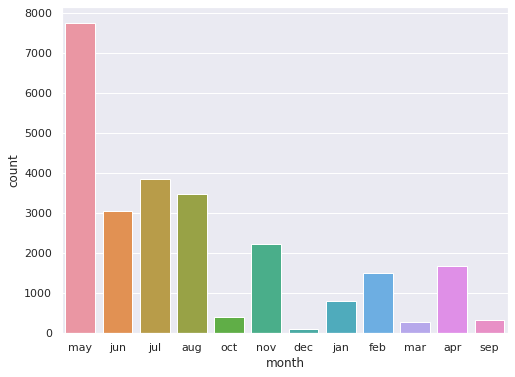

In [118]:
sns.countplot(x='month', data=df)

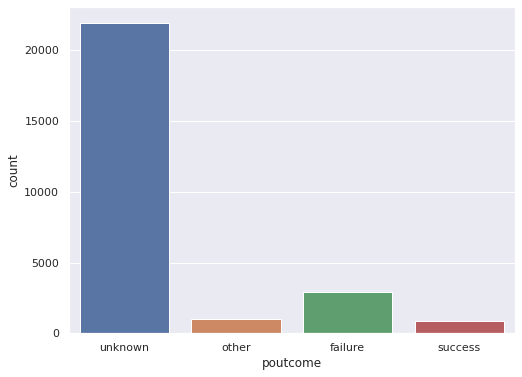

In [119]:
sns.countplot(x='poutcome', data=df)

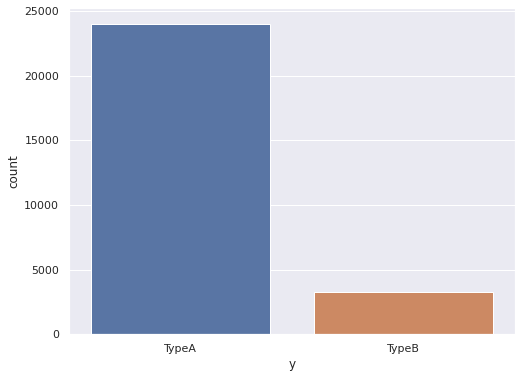

In [120]:
sns.countplot(x='y', data=df)

Agora vamos demonstrar o boxplot. Note que apesar de o `boxplot` estar listado nos gráficos para variávei categóricas do `seaborn`, esta função funciona somente com variáveis continuas!

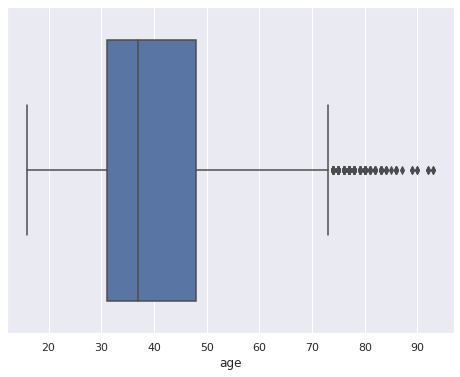

In [121]:
sns.boxplot(x='age', data=df)

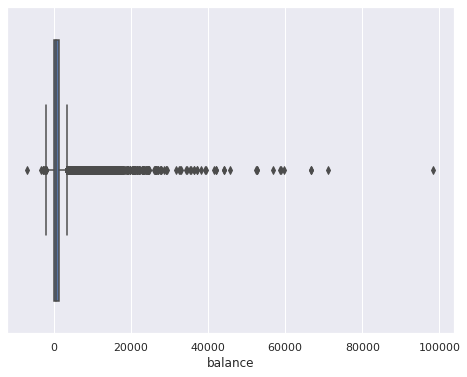

In [122]:
sns.boxplot(x='balance', data=df)

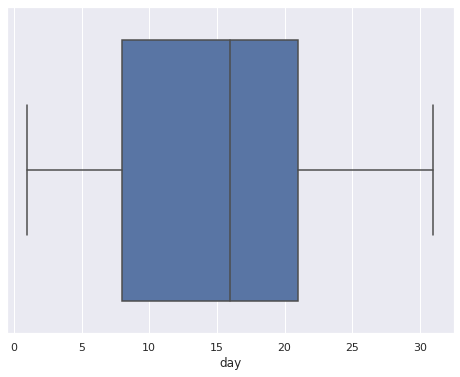

In [123]:
sns.boxplot(x='day', data=df)

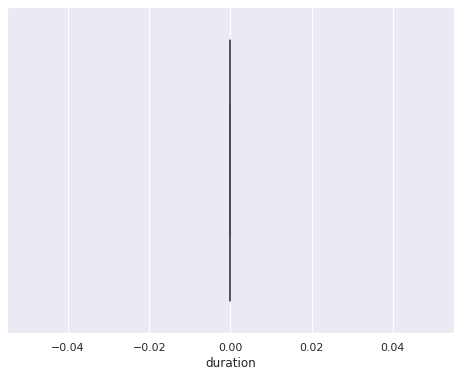

In [124]:
sns.boxplot(x='duration', data=df)

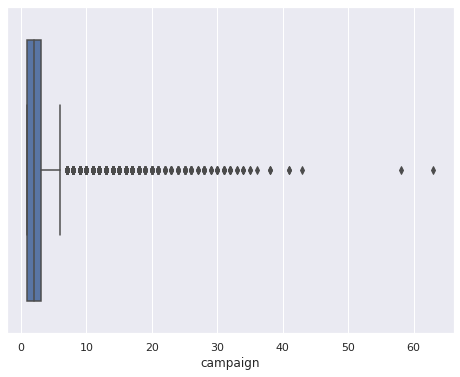

In [125]:
sns.boxplot(x='campaign', data=df)

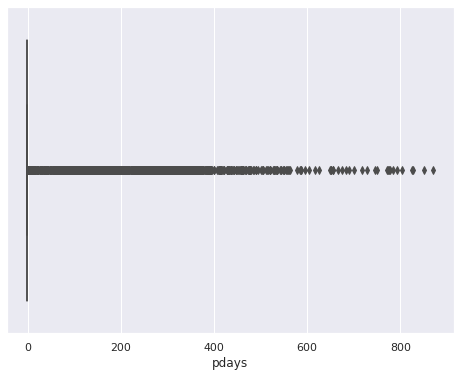

In [126]:
sns.boxplot(x='pdays', data=df)

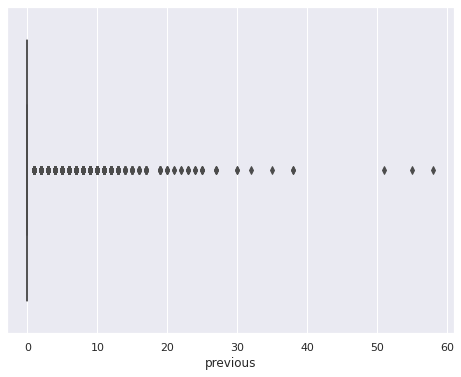

In [127]:
sns.boxplot(x='previous', data=df)

O `boxplot` ainda possui uma funcionalidade interessante que é a definição das cores do gráfico conforme alguma variável do tipo categórica. Para isso,  basta informarmos o nome da variável do dataset a ser utilizada para as cores como o parâmetro `x` e a variável a ser utilizada para gerar o gráfico propriamente dito como parâmetro `y`. Iste irá gerar os `boxplots` na vertical. Se quisermos visualizá-los na horizontal, basta invertermos os valores dos parâmetros.

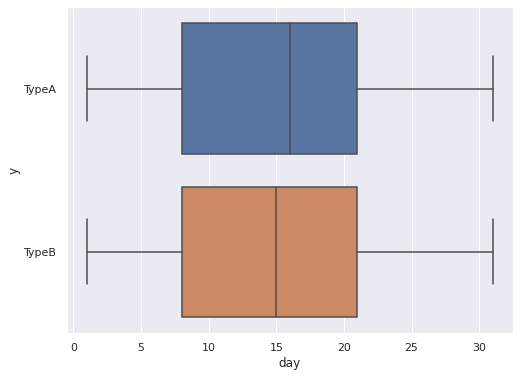

In [128]:
sns.boxplot(x='day', y='y', data=df)

## Outras formas de criar os gráficos


#### Com o `seaborn`
A biblioteca `seaborn` é muito flexível. Podemos passar listas de valores, arrays do `numpy`, entre outros, ao invés de `dataframes` e ainda assim teremos os gráficos gerados de forma rápida e precisa:



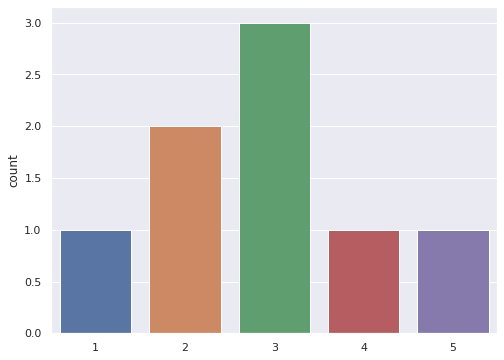

In [129]:
sns.countplot(x=[1, 2, 2, 3, 3, 3, 4, 5])

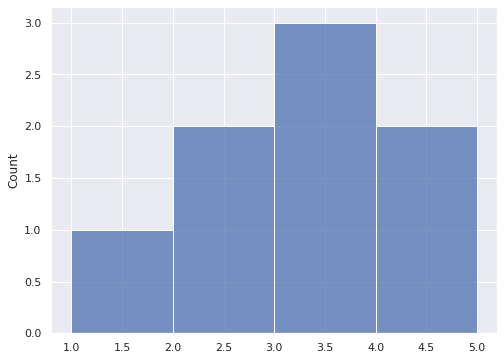

In [130]:
sns.histplot(x=[1, 2, 2, 3, 3, 3, 4, 5])

Podemos ainda passar uma variável selecionada diretamente do `dataframe`:

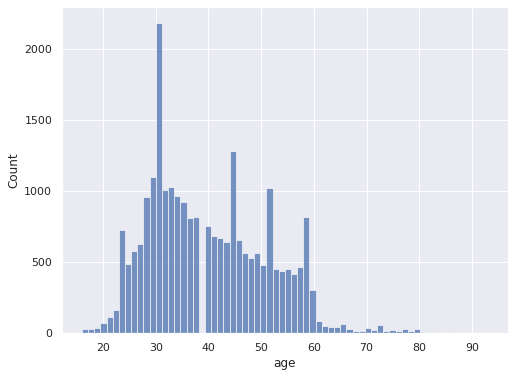

In [131]:
sns.histplot(x=df['age'])

#### Com `pandas`


A biblioteca `pandas` também tem a sua forma de geração de gráficos, encapsulando também a biblioteca `matplotlib`. Para criar o gráfico: selecionamos a variável com o operador de colchetes (`[]`); utilizamos a função `plot`; e informamos o tipo de gráfico (`hist`, `bar` ou `box`) através do parâmetro `kind`.

Note como o `pandas` apenas informa o nome do eixo `y` como `Frequency` e não informa o nome do eixo `x`. O `seaborn` informa o nome de ambos os eixos. Isto pode não parecer muita coisa, mas quando visualizamos várias imagens ao mesmo tempo, a informação dos nomes dos eixos pode ser de grande ajuda.

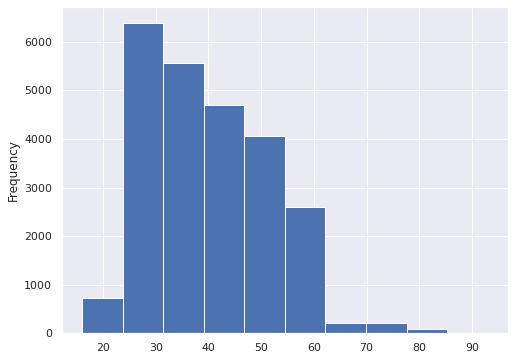

In [132]:
df['age'].plot(kind='hist')

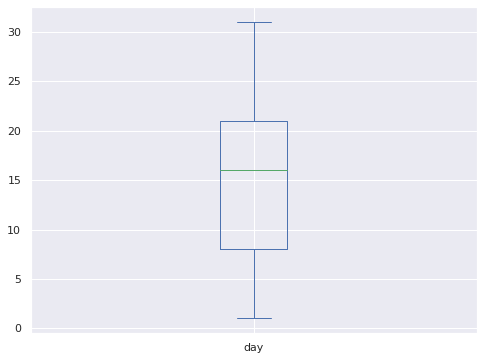

In [133]:
df['day'].plot(kind='box')

No entando, a biblioteca `pandas` não possui uma forma de gerar gráficos de barra com a frequência de variáveis categóricas. Quando criamos um gráfico de barras, devemos primeiro contar a quantidade de valores de cada nível da variável (*i.e.*, devemos calcular suas frequências) e proveer esta contagem para a função `plot`. Para nossa sorte, há a função `value_counts()` que pode ser aplicada sobre a variável para geração das frequências:

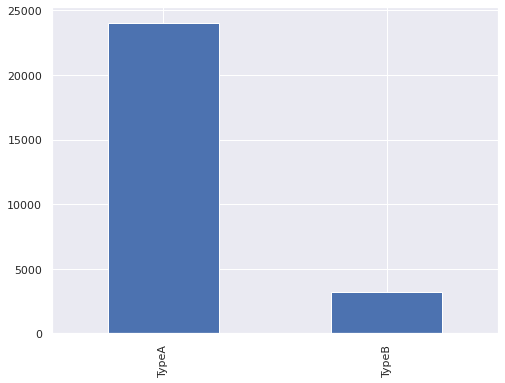

In [134]:
df['y'].value_counts().plot(kind='bar')

## Verificando os problemas das `features`

### Valores faltando

Para lidarmos com valores faltantes, o `pandas` possui duas funções bastante interessantes:

* `isna`
* `fill_na`

Com elas podemos verificar se há valores faltantes em alguma das `features` do dataset e preenchermos os valores automaticamente através da imputação. Vamos testá-las abaixo começando com `isna`:


In [135]:
df[df['age'].isna()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9,NaN,JobCat11,single,unknown,no,13.0,yes,no,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
35,NaN,JobCat11,single,secondary,no,-76.0,NaN,no,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
37,NaN,JobCat3,single,unknown,no,24.0,yes,no,unknown,5.0,may,NaN,NaN,-1.0,0.0,unknown,TypeA
61,NaN,NaN,married,secondary,no,0.0,yes,no,unknown,5.0,may,0.0,1.0,-1.0,0.0,unknown,TypeA
75,NaN,JobCat9,divorced,NaN,no,56.0,yes,no,unknown,5.0,may,0.0,1.0,NaN,0.0,unknown,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27219,NaN,JobCat4,single,tertiary,no,262.0,yes,yes,unknown,NaN,oct,0.0,1.0,-1.0,0.0,unknown,TypeA
27228,NaN,JobCat6,single,tertiary,no,NaN,no,no,cellular,8.0,nov,0.0,1.0,-1.0,0.0,unknown,TypeB
27241,NaN,NaN,married,secondary,no,4428.0,no,no,cellular,9.0,nov,0.0,1.0,96.0,6.0,failure,TypeA
27262,NaN,JobCat6,married,tertiary,no,1428.0,no,no,cellular,16.0,nov,0.0,2.0,-1.0,0.0,unknown,TypeA


Como podemos observar, há 2702 linhas onde o a variável `age` não possui valores preenchidos. Isto corresponde a mais ou menos $10\%$ do dataset. Portanto podemos proceder com o processo de imputação. Neste caso, iremos utilizar o valor da mediana da variável para preencher os faltantes. Primeiro nós obtemos o valor da moda e depois realizamos o preenchimento com `fillna`.

In [136]:
mediana_age = df['age'].median()
df['age'] = df['age'].fillna(mediana_age)

Agora verificamos se tudo correu bem:

In [137]:
df[df['age'].isna()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


Pronto, não há mais nenhum valor faltante na variável `age`. 

### `Outliers`

Para realizarmos a verificação dos `outliers`, precisamos utilizar a função `apply` do `pandas` com uma função `lambda`. Nesta função `lambda`, iremos colocar o código de verificação dos limites. Faremos a conversão utilizando a variável `balance` como exemplo. Para isso, primeiro verificaremos novamente o histograma da variável e as suas estatísticas:

count    22510.000000
mean      1373.054687
std       3100.869406
min      -6847.000000
25%         71.000000
50%        443.000000
75%       1423.000000
max      98417.000000
Name: balance, dtype: float64


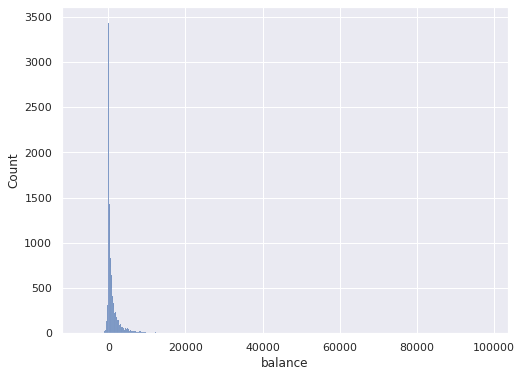

In [138]:
print(df['balance'].describe().transpose())
sns.histplot(x='balance', data=df)

Para demonstração, iremos setar os valores de -10000 para o limite inferior e 20000 para o limite superior. 

In [139]:
def clamp_balance(row, limite_inferior, limite_superior):
    if row['balance'] < limite_inferior:
        return limite_inferior
    elif row['balance'] > limite_superior:
        return limite_superior
    else:
        return row['balance']

Note como o parâmetro `row` da função acima pode ser utilizada para selecionar uma variável da mesma forma como se estivéssemos selecionando a partir do dataframe. No entanto, como o próprio nome da variável indica, estamos selecionando o valor da variável referente a uma linha do dataset de forma individual.

Vamos aplicar a função e criar uma nova coluna no `dataset` para não perdermos os valores originais:

In [140]:
df['balance_clmp'] = df.apply(lambda row: clamp_balance(row, -10000, 20000), axis=1)

Agora verificamos como ficou a distribuição da variável `balance`:

count    22510.000000
mean      1325.306442
std       2545.522662
min      -6847.000000
25%         71.000000
50%        443.000000
75%       1423.000000
max      20000.000000
Name: balance_clmp, dtype: float64


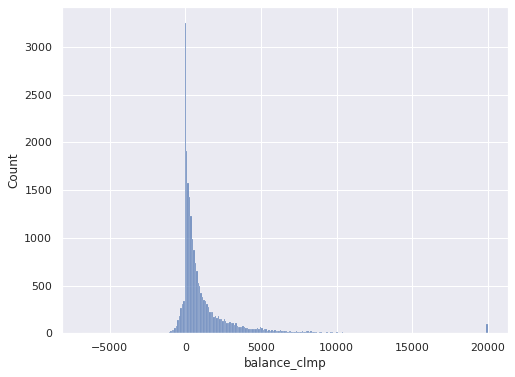

In [141]:
print(df['balance_clmp'].describe().transpose())
sns.histplot(x='balance_clmp', data=df)

A distribuição da variável parece um pouco melhor, mas ainda assim está um pouco esquisita e devemos continuar explorando outros valores de limites.